In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

# Generate Different Rulesets of Wolfram's Cellular Automata

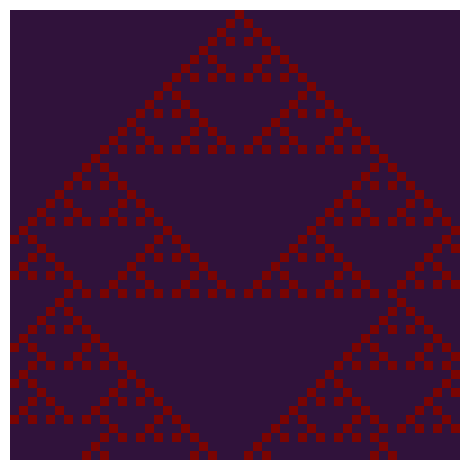

In [36]:
N = 50

# Initialize Grid with zeros
grid = np.zeros((N, N))

"""
Cellular Automata Ruleset.
In 1D, there are 2^3 = 8 possible binary states for a cell's neighborhood,	
and 2^8 = 256 possible rulesets.
We can represent a ruleset as an 8-bit binary number, where each bit
determines the state of a cell in the next generation.
For example, the ruleset 30 is represented by the binary number 00011110.
The leftmost bit corresponds to the state of the cell 111, and the rightmost
bit corresponds to the state of the cell 000.
The bit value determines the state of the cell in the next generation.
For example, if the bit value is 1, then the cell will be alive in the next
generation, and if the bit value is 0, then the cell will be dead.

Here are some interesting rulesets:
- Rule 182 - Sirpinski triangle
- Rule 18,218 - Inverted Sirpinski triangle
- Rule 30 - Chaos
- Rule 110 - Turing complete
- Rule 57 - Mirrored Triangle
"""
rule = 18
# Convert to 8-bit binary representation
rule_binary = np.binary_repr(rule, 8)

def update(grid, row, *, periodic = True):
    # Alias the current row
    current_row = grid[row]
    # Initialize the new row with zeros
    new_row = np.zeros(N)
    for i in range(N):
        # Get the neighborhood of the current cell, periodic boundary conditions
        left_index = (i-1) % N if periodic else max(i-1, 0)
        right_index = (i+1) % N if periodic else min(i+1, N-1)
        left = int(current_row[left_index])
        center = int(current_row[i])
        right = int(current_row[right_index])
        # Get the value of the new cell based on the neighborhood
        # Determine the position of the bit in the ruleset based on the neighborhood
        new_row[i] = int(rule_binary[7 - (left * 4 + center * 2 + right)])
    # Update the grid
    grid[(row+1) % N] = new_row

# Initial Condition is either a single cell, or a random row
grid[0, N//2] = 1  # Single Cell
# grid[0,:] = np.random.randint(0, 2, N)  # Random Row

for i in range(N-1):
    update(grid, i, periodic = False)
    plt.axis('off')
    plt.tight_layout()
    plt.imshow(grid, cmap='turbo', vmin=0, vmax=1)
    plt.show()
    time.sleep(0.01)  # pause for 1 second
    clear_output(wait=True)  # clear the output for the next plot

# Generate a Completely Random CA using a random rule and random initial conditions

Rule 167: 10100111
Initial Condition:
  Random Row
Boundary Condition: Periodic


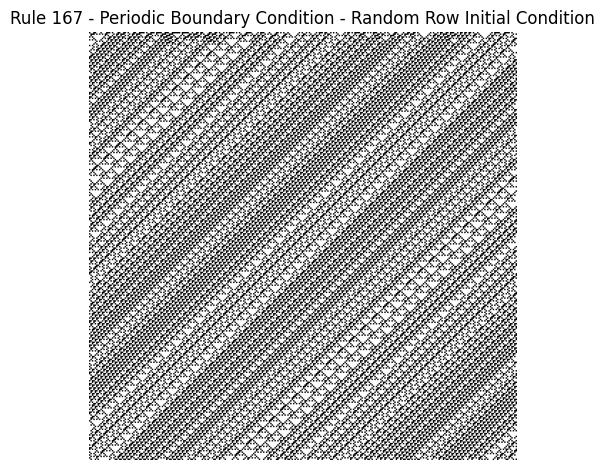

In [145]:
# Grid Size
N = 300
# Chose a random rule
rule = np.random.randint(0, 256)
# Convert to 8-bit binary representation
rule_binary = np.binary_repr(rule, 8)
print(f"Rule {rule}: {rule_binary}")

# Reset Grid
grid = np.zeros((N, N))

# Chose a random initial condition. Do a 50:50 random choice for initializing a single cell or a random row.
print("Initial Condition:")
if np.random.rand() > 0.5:
    print("  Single Cell")
    # Single Cell
    if np.random.rand() > 0.5:
        print("    Center Cell")
        # Center Cell
        grid[0, N//2] = 1
    else:
        print("    Random Cell")
        # Random Cell
        cell = np.random.randint(0, N)
        grid[0, cell] = 1
else:
    print("  Random Row")
    # Random Row
    grid[0,:] = np.random.randint(0, 2, N)

# Boundary condition
periodic = np.random.rand() > 0.5
print(f"Boundary Condition: {'Periodic' if periodic else 'Fixed'}")

# Run the simulation
for i in range(N-1):
    update(grid, i, periodic=periodic)

# Plot the result
plt.title(f"Rule {rule} - {'Periodic' if periodic else 'Fixed'} Boundary Condition - {'Single Cell' if np.sum(grid[0, :]) < 2 else 'Random Row'} Initial Condition")
plt.axis('off')
plt.tight_layout()
plt.imshow(grid, cmap='grey', vmin=0, vmax=1)
